# Reverse engineer to fix bug

## Description:

Relevant issue: https://github.com/comphy-lab/BurstingBubble_Herschel-Bulkley/issues/1

The basilisk script needs the points to be sorted such that the first point is the south pole of the bubble cavity then you walk along the liquid-gas interface towards the bubble cap and then join to the far field liquid-gas interface (which is a straight line). 

![sortIndex](sortIndex.png)

## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FigureWidth = 3.375
factor = 3
# Set global parameters
params = {
          'lines.linewidth': 3,
          'axes.labelsize': int(9*factor),
          'legend.fontsize': int(6.5*factor),
          'xtick.labelsize': int(9*factor),
          'ytick.labelsize': int(9*factor),
          'text.usetex': True,
          'font.family': 'serif'}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

def prepare_plot(params):
    fig, ax = plt.subplots(figsize=(FigureWidth*(factor+1), FigureWidth*(factor+1)/2))
    ax.set_xlim(params["Rmin"], params["Rmax"])
    ax.set_ylim(params["Zmin"], params["Zmax"])
    ax.set_xlabel(r'$r/R_0$')
    ax.set_ylabel(r'$z/R_0$')
    ax.set_aspect('equal')
    return fig, ax

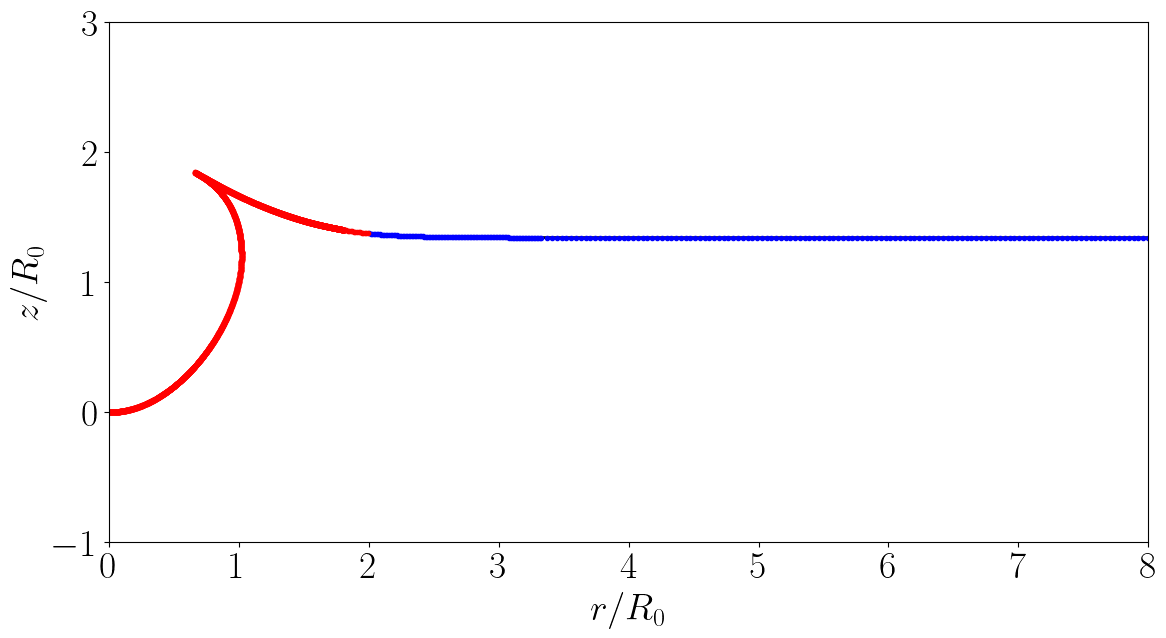

In [2]:
df = pd.read_csv('Bo1.0000-buggy.dat', sep='\s+', header=None, names=['z', 'r'])
r = df['r'].values
z = df['z'].values

dz_dr = np.arctan2(np.gradient(z), np.gradient(r))
sorted_indices = np.argsort(dz_dr)
r_sorted = r[sorted_indices]
z_sorted = z[sorted_indices]

r, z = r_sorted, z_sorted

ind = r > 2.0
r2, z2 = r[ind], z[ind]
indSort = np.argsort(r2)
r2, z2 = r2[indSort], z2[indSort]

ind = r < 2.0
r3, z3 = r[ind], z[ind]

r, z  = np.concatenate([r3, r2]), np.concatenate([z3, z2])

# Define plotting parameters
plt_params = {
    "Rmin": 0.0, "Rmax": 8e0,
    "Zmin": -1e0, "Zmax": 3e0
}

fig, ax = prepare_plot(plt_params)

ax.plot(r, z, 'k-', lw=2)

ax.plot(r2, z2, 'b.')
ax.plot(r3, z3, 'r.')

df = pd.DataFrame({'z': z, 'r': r})

df.to_csv('Bo1.0000-buggy_fixed.dat', index=False, sep=' ', header=False)

plt.show()

# Note:

Although the above code fixes the bug in [Bo1.0000-buggy.dat](Bo1.0000-buggy.dat), it would be better to ensure that the points are sorted as per the image below.

![sortIndex](sortIndex.png)

If not, then one would need to reverse engineer (like the code snippet above) to fix the sorting for each case.
